In [2]:
from read_explore_data import read, preview, gen_hist
from preprocess import mean_impute, impute_to_value, cat_from_cont, med_impute
from models import logistic_reg, splitX_y, create_samples, model_loop
from sklearn.cross_validation import train_test_split
import numpy as np

In [3]:
from pipeline import go

In [4]:
xtrain, xtest, ytrain, ytest = go()

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [5]:
from models import gridsearch_model

In [6]:
d = gridsearch_model(xtrain, xtest, ytrain, ytest, ['LR','KNN'])

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0) 

{
  "Precision": 0.5371,
  "Accurary": 0.9337,
  "AUC": 0.5161,
  "F1 Score": 0.0647,
  "Recall": 0.0344,
  "Train Time (s)": 14.268702983856201
} 

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'algorithm': ['auto', 'ball_t

In [7]:
d

AttributeError: 'NoneType' object has no attribute 'items'

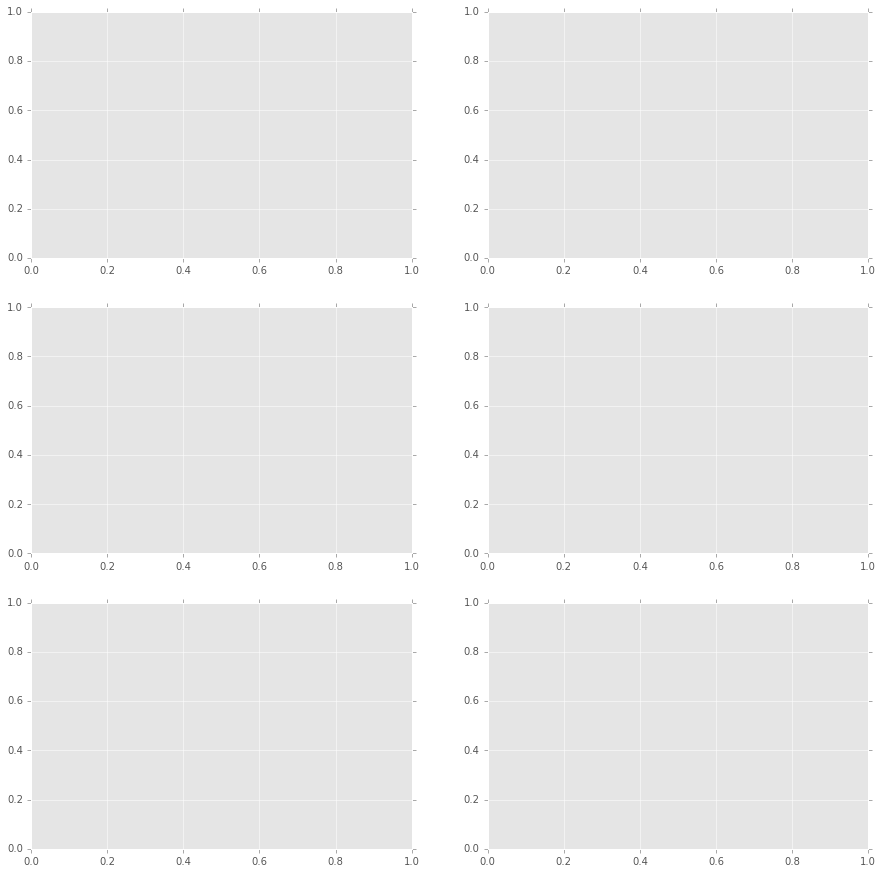

In [8]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

f, axarr = plt.subplots(3, 2, figsize = (15,15))
plt.setp(axarr)
i = 0
j = 0
for metric, models in d.items():
    xlabels = models.keys()
    X = range(len(models))
    axarr[i, j].bar(X, models.values(), align='center', width=0.5)
    axarr[i, j].set_title(metric)
    i += 1
    if i < 3:
        continue
    else:
        j += 1
        i = 0
plt.setp(axarr, xticks = X, xticklabels = xlabels)
plt.savefig('modelComparison.png')

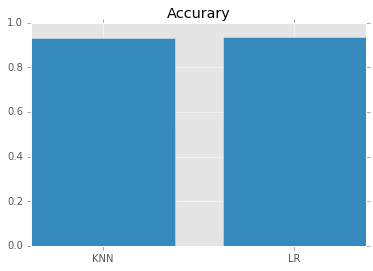

In [30]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

for metric, models in d.items():
    X = range(len(models))
    plt.bar(X, models.values(), align='center', width=.75)
    plt.xticks(X, models.keys())
    plt.title(metric)

In [4]:
model_loop(xtrain, xtest, ytrain, ytest, ['LR'])

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
 

In [5]:
model_loop(xtrain, xtest, ytrain, ytest, ['KNN'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')
KNeighborsC

In [14]:
xtest.MonthlyIncome

1          9120.0
3          3042.0
4          3300.0
5         63588.0
6          3500.0
7          5416.0
8          3500.0
9          5416.0
10        23684.0
11         2500.0
12         6501.0
13        12454.0
14        13700.0
15            0.0
16        11362.0
17         5416.0
18         8800.0
19         3280.0
21        12300.0
22         3000.0
23         2500.0
24         7916.0
27         8333.0
28         2500.0
29         3400.0
30         5500.0
31         4200.0
32          750.0
33         5416.0
35         2230.0
           ...   
149964     5416.0
149965     6015.0
149967    16000.0
149968     5416.0
149969     4600.0
149970    14700.0
149971    15500.0
149973     6945.0
149974     5500.0
149975     5000.0
149976     5416.0
149977     5416.0
149978     5416.0
149979     2500.0
149980     8700.0
149981     5525.0
149982     6849.0
149983     2760.0
149984     5000.0
149986     1950.0
149987     5000.0
149988     3249.0
149989     7515.0
149993     5416.0
149994    

In [13]:
off_set

1          9121.0
3          3043.0
4          3301.0
5         63589.0
6          3501.0
7          5417.0
8          3501.0
9          5417.0
10        23685.0
11         2501.0
12         6502.0
13        12455.0
14        13701.0
15            1.0
16        11363.0
17         5417.0
18         8801.0
19         3281.0
21        12301.0
22         3001.0
23         2501.0
24         7917.0
27         8334.0
28         2501.0
29         3401.0
30         5501.0
31         4201.0
32          751.0
33         5417.0
35         2231.0
           ...   
149964     5417.0
149965     6016.0
149967    16001.0
149968     5417.0
149969     4601.0
149970    14701.0
149971    15501.0
149973     6946.0
149974     5501.0
149975     5001.0
149976     5417.0
149977     5417.0
149978     5417.0
149979     2501.0
149980     8701.0
149981     5526.0
149982     6850.0
149983     2761.0
149984     5001.0
149986     1951.0
149987     5001.0
149988     3250.0
149989     7516.0
149993     5417.0
149994    